# Análisis de correlación y Análisis de regresión

In [2]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 09-01 Análisis de correlación

## Pruebas y estimaciones del coeficiente de regresión poblacional
* Relación de correlación
* Análisis de correlación
* Coeficiente de correlación
* Coeficiente de correlación muestral ($
r = \frac{S_{xy}}{\sqrt{S_{xx} \times S_{yy}}}$)
* Coeficiente de correlación poblacional ($ \rho $)

### Coeficiente de correlación

### Prueba de no correlación
* Transformada Z

### Prueba en caso de correlación distinta de cero

### Estimación del coeficiente de correlación poblacional
* Estimación puntual del coeficiente de orrelación poblacional ($ \hat{\rho} = r  $)
* Estimación por intervalo del coeficiente de correlación poblacional


## 9.1

加工食品Aの製造工程で、焼成時間x（分）と歯応えy（硬さ）の間にどのような関係があるか調べる。
1.   xとyの相関係数を計算する
2.   有意水準５％で無相関の検定をする
3.   母相関係数が0.50より大きいか検定する
3.   信頼区間95%で区間推定をする

Investigar qué relación existe entre el tiempo de cocción $ x $(minutos) y  la textura $ y $ (dureza) en el proceso de fabricación del producto alimenticio A.

1. Calcular el coeficiente de correlación entre el tiempo de cocción $ x $ (minutos) y la textura $ y $ (dureza)
2. Realizar una prueba de hipótesis para determinar la independencia entre $ x $  e $ y $ con un nivel de signiciacio del 5%
3. Probar si el coeficiente de correlación poblacional es mayor que 0.50
4. Estimar un intervalo de confianza del 95% para el coeficiente de correlación.

In [4]:
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet1") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)

# Establecer la primera columna como índice
df = df.set_index(df.columns[0])

df[["x","y"]] = df[["x","y"]].apply(pd.to_numeric)
data = df.copy()

df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df["xy"] = df["x"]*df["y"]
df.loc["Total"] = df.sum()

df.to_excel("Data_1/Tabla_9_1.xlsx")

print("Tabla 9.1: Tabla de datos del producto alimenicio x e y, y tabla auxiliar de cáluculos")
df

Tabla 9.1: Tabla de datos del producto alimenicio x e y, y tabla auxiliar de cáluculos


,x,y,x^2,y^2,xy
No,,,,,
1,28,69,784,4761,1932
2,21,65,441,4225,1365
3,21,64,441,4096,1344
4,23,61,529,3721,1403
5,25,70,625,4900,1750
6,30,63,900,3969,1890
7,26,68,676,4624,1768
8,25,67,625,4489,1675
9,21,63,441,3969,1323


## Diagrama de dispersión

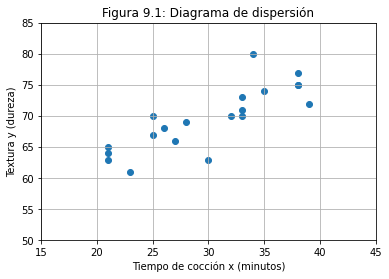

In [5]:
plt.scatter(data["x"],data["y"])
plt.xlim(15,45)
plt.ylim(50,85)
plt.xlabel("Tiempo de cocción x (minutos)")
plt.ylabel("Textura y (dureza)")
plt.title("Figura 9.1: Diagrama de dispersión")
plt.grid()


##Cálculo del coeficiente de correlación

$ S_{xx} = \sum x^2 - \frac{\bigl( \sum x \bigr)^2}{n} = 18716 - \frac{(600)^2}{20} = 716   $

$ S_{yy} = \sum y^2 - \frac{\bigl( \sum y \bigr)^2}{n} = 97519 - \frac{(1395)^2}{20} = 496.55 $

$ S_{xy} = \sum xy - \frac{\sum x \times \sum y}{n} = 42278 - \frac{600 \times 1393}{20} = 488 $

$ r = \frac{Sxy}{\sqrt{Sxx \times Syy}} $

In [6]:
x = data["x"]
y = data["y"]
n = len(x)

#Cálculo manual
Sxx = np.sum(x**2) - (np.sum(x)**2)/n
Syy = np.sum(y**2) - (np.sum(y)**2)/n
Sxy = np.sum(x*y) - (np.sum(x)*np.sum(y))/n
r = Sxy/(np.sqrt(Sxx)*np.sqrt(Syy))

print(f"Sxx = {Sxx:.3f}")
print(f"Syy = {Syy:.3f}")
print(f"Sxy = {Sxy:.3f}")
print(f"r = {r:.3f}")

#NumPy
r_ = np.corrcoef(x,y)[0,1]

print(f"r (NumPy) = {r_:.3f}")


Sxx = 716.000
Syy = 496.550
Sxy = 488.000
r = 0.818
r (NumPy) = 0.818


## Prueba de no correlación

In [7]:
from scipy.stats import pearsonr
from scipy.stats import norm

X = data["x"]
y = data["y"]

# Calcula el coeficiente de correlación
correlation, p_value = pearsonr(X, y)
print(f"Coeficiente de correlación: {correlation:.3f}")
print(f"Valor p: {p_value:.3e}")

# Prueba de no correlación con un nivel de significancia del 5%
if p_value < 0.05:
    print("Se rechaza la hipótesis nula: Existe una correlación significativa entre x e y")
else:
    print("Se acepta la hipótesis nula: No existe una correlación significativa entre x e y")

Coeficiente de correlación: 0.818
Valor p: 1.032e-05
Se rechaza la hipótesis nula: Existe una correlación significativa entre x e y


## Probar si el coeficiente de correlación poblacional es mayor que 0.50

In [8]:
X = data["x"]
y = data["y"]
n = len(X)

correlation, _ = pearsonr(X, y)

def fisher_z_transform(r):
    return 0.5 * np.log((1 + r) / (1 - r))

def z_test_for_correlation(correlation, n, r_0, alpha=0.05):
    z_sample = fisher_z_transform(correlation)
    z_null = fisher_z_transform(r_0)
    se = 1 / np.sqrt(n - 3)
    z_statistic = (z_sample - z_null) / se
    p_value = 1 - norm.cdf(z_statistic)

    if p_value < alpha:
        return f"El coeficiente de correlación poblacional es significativamente mayor que {r_0} (rechazo de la hipótesis nul)", p_value
    else:
        return f"No se puede concluir que el coeficiente de correlación poblacional sea mayor que {r_0} (aceptación de la hipótesis nula)", p_value


# Prueba
r_0 = 0.50
result, p_value = z_test_for_correlation(correlation, n, r_0)

print(f"Correlación de correlación de poblacional: {correlation:0.3f}")
print(f"Resultado: {result}")
print(f"Valor p: {p_value:0.4f}")


Correlación de correlación de poblacional: 0.818
Resultado: El coeficiente de correlación poblacional es significativamente mayor que 0.5 (rechazo de la hipótesis nul)
Valor p: 0.0065


## Cálculo del intervalo de confianza para el coeficiente de correlación poblacional

In [9]:
# Calcula el coeficiente de correlación y el valor p
r, _ = pearsonr(X, y)

# Tamaño de la muestra de los datos.
n = len(X)

# Transformación z de Fisher
z = 0.5 * np.log((1 + r) / (1 - r))

# Error estándar
SE_z = 1 / np.sqrt(n - 3)

# Cálculo del intervalo de confianza del 95% (rango de puntuaciones z)
z_lower = z - 1.96 * SE_z
z_upper = z + 1.96 * SE_z

# Invertir la transformación del intervalo de confianza para obtener el coeficiente de correlación original
r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

# Salida de los resultados
print(f"Coeficiente de correlación: {r:.3f}")
print(f"Intervalo de confianza del 95%: ({r_lower:.3f}, {r_upper:.3f})")

Coeficiente de correlación: 0.818
Intervalo de confianza del 95%: (0.589, 0.926)


# 09-02 Análisis de regresión simple

## Análisis de regresión simple
* Análisis de regresión
* Variable explicativa Variable independiente
* Variable dependiente Variable dependiente
* Análisis de regresión simple
* Coeficiente de regresión
* Parámetro de regresión poblacional
* Recta de regresión
* Método de los mínimiso cuadrados
* Suma total de los cuadrados
* Suma de los cuadrados de regresión
* Suma de los cuadrados de los residuos
* Descomposición de la suma de los cuadrados
* Tasa de contribución



## 9.2

部品Bの製造工程における、原材料の純度x（%）と品質特性y（MPa）の間にどのような関係があるか調べる。データを採取し表9.3を作成した。

1. 回帰母数β０、β１を推定し、母回帰式をもとめよ
2. 分散分析表を作成し、回帰に意味があるかどうか検定せよ
3. 寄与率を計算せよ


Para investigar la relación entre la pureza de la materia prima, $ x $ (%), y la característica de calidad, $ y $ (MPa), en el proceso de fabricación del componente B, se recopiló la información y se creó la Tabla 9.3.

1. Estimar los parámetros de regresión  $ \beta_0 $ y $ \beta_1 $, y determinar la ecuación de regresión poblacional

2. Elabore una tabla de análisis de varianza y prueba si la regresión es significativa

3. Calcule el coeficiente de determinación

In [10]:
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet2") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)

# Establecer la primera columna como índice
df = df.set_index(df.columns[0])

df[["x","y"]] = df[["x","y"]].apply(pd.to_numeric)
data = df.copy()

df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df["xy"] = df["x"]*df["y"]
df.loc["Total"] = df.sum()

df.to_excel("Data_1/Tabla_9_3.xlsx")

print("Tabla 9.3: Tabla de datos y tabla auxiliar de cáluculos")
df

Tabla 9.3: Tabla de datos y tabla auxiliar de cáluculos


,x,y,x^2,y^2,xy
No,,,,,
1,66,20,4356,400,1320
2,65,11,4225,121,715
3,64,14,4096,196,896
4,67,10,4489,100,670
5,60,15,3600,225,900
6,62,20,3844,400,1240
7,69,15,4761,225,1035
8,70,18,4900,324,1260
9,75,17,5625,289,1275


## 9.2-1

Ecuación de regresión: y = -31.813 + 0.740x
Resultados del análisis de regresión:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     20.36
Date:                Fri, 02 May 2025   Prob (F-statistic):           0.000157
Time:                        18:09:44   Log-Likelihood:                -69.276
No. Observations:                  25   AIC:                             142.6
Df Residuals:                      23   BIC:                             145.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

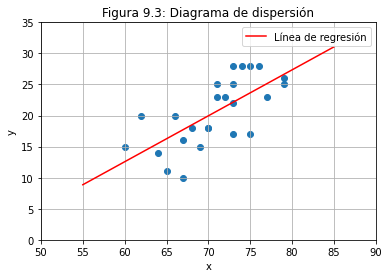

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

y = data["y"]
X = data["x"]

plt.scatter(X,y)
plt.xlim(50,90)
plt.ylim(0,35)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figura 9.3: Diagrama de dispersión")
plt.grid()

# Análisis de regresión (método de mínimos cuadrados)
X_with_const = sm.add_constant(X)  # Agregar el término constante (β0)
model = sm.OLS(y, X_with_const)
results = model.fit()  # Ajuste del modelo de regresión

# Representación de la línea de regresión
xx = np.linspace(55,85,100)
plt.plot(xx, results.params.iloc[0] + results.params.iloc[1]*xx, color="red", label="Línea de regresión")
plt.legend()

# Mostrar la ecuación de regresión
print(f"Ecuación de regresión: y = {results.params.iloc[0]:.3f} + {results.params.iloc[1]:.3f}x")

# Mostrar los resultados del análisis de regresión
print("Resultados del análisis de regresión:")
print(results.summary())


OLS Regression Results の表は、回帰分析の結果を要約して表示するもので、多くの重要な統計情報が含まれています。以下に、表の各部分の意味と見方を説明します。

1. Dep. Variable (従属変数)
回帰モデルで予測しようとしている変数の名前です。
2. R-squared (決定係数)
モデルがデータの分散をどれだけ説明できるかを示す指標。0から1の範囲をとり、値が1に近いほど良いモデルを意味します。
3. Adj. R-squared (自由度調整済み決定係数)
説明変数の数を考慮した決定係数。説明変数が多すぎるモデルを避けるために使います。
4. F-statistic (F統計量)
モデル全体が有意かどうかを検定する統計量。対応する p 値が小さいほど、モデルが有意であることを示します。
5. Prob (F-statistic) (F統計量のp値)
モデル全体の有意性を判断するための p 値。通常、0.05未満ならモデルは有意です。
6. Log-Likelihood (対数尤度)
モデルの適合度を表す指標で、数値が大きいほど良いモデルです。
7. AIC (赤池情報量基準) と BIC (ベイズ情報量基準)
モデルの良さを測る情報量基準。値が小さいほど良いモデル。
8. Coefficients (回帰係数)
説明変数と従属変数の関係を示す係数。
const (切片): 回帰直線が y 軸と交わる点。
説明変数 (e.g., X1, X2): 説明変数1単位あたりの従属変数の変化。
9. Std. Error (標準誤差)
回帰係数の推定値の不確実性を示す。
10. t (t値) と P>|t| (p値)
各回帰係数がゼロであるという仮説を検定する t 値とその p 値。
通常、p 値が0.05未満であれば有意。
11. [0.025, 0.975] (信頼区間)
各係数の95%信頼区間。

La tabla de resultados de OLS Regression Results resume los resultados del análisis de regresión, incluyendo estadísticas clave. Aquí se explica cada sección y cómo interpretarla:

1. Dep. Variable (Variable dependiente)
El nombre de la variable que se intenta predecir con el modelo de regresión.
2. R-squared (Coeficiente de determinación)
Indica qué proporción de la varianza de los datos es explicada por el modelo. Varía entre 0 y 1, donde valores más cercanos a 1 indican un mejor ajuste del modelo.
3. Adj. R-squared (Coeficiente de determinación ajustado)
Considera el número de variables independientes. Ayuda a evitar un modelo sobre ajustado.
4. F-statistic (Estadístico F)
Evalúa la significancia del modelo en su conjunto. Un valor p bajo sugiere que el modelo es significativo.
5. Prob (F-statistic) (Valor p del estadístico F)
Indica la significancia global del modelo. Un valor inferior a 0.05 generalmente sugiere que el modelo es significativo.
6. Log-Likelihood (Logaritmo de verosimilitud)
Mide el ajuste del modelo. Valores más altos indican mejor ajuste.
7. AIC y BIC (Criterios de información de Akaike y Bayes)
Miden la calidad del modelo. Valores más bajos indican mejor ajuste.
8. Coefficients (Coeficientes de regresión)
Muestran la relación entre las variables independientes y dependientes.
const: Intersección de la recta de regresión con el eje y.
Variables independientes (e.g., X1, X2): Cambio en la variable dependiente por cada unidad de cambio en la variable independiente.
9. Std. Error (Error estándar)
Mide la incertidumbre de los coeficientes estimados.
10. t y P>|t|
Prueba si los coeficientes son significativamente diferentes de cero.
Un valor p < 0.05 generalmente indica significancia.
11. [0.025, 0.975] (Intervalo de confianza)
Intervalo de confianza del 95% para los coeficientes.


## 9.2-2

### 分散分析表

複数のグループの平均の違いを検定すること

分散分析は母平均を検定している。（T検定と同じ）

分散分析は３群以上の時に使う

帰無仮説と対立仮説を確認すると、分散分析で有意になったとしても、どの群の平均が異なるか、ということまではわからない

分散分析をした後に２群検定の多重比較は推奨しない

回帰式 $ \hat{\mu} = \hat{\beta}_0 + \hat{\beta}_1 x $

総平方和 $ S_T = \sum (y_i - \bar{y})^2 $

回帰平方和 $ S_R = \sum (\hat{y}_i - \bar{y})^2 = \hat{\beta}_1^2 S_{xx} = \frac{S_{xy}^2}{S_{xx}}$

残差平方和 $ S_{\epsilon} = \sum (y_i - \hat{y}_i)^2 $


### Tabla de análisis de varianza (ANOVA)

El análisis de varianza se utiliza para comparar las medias de múltiples grupos.

El análisis de varianza es una prueba para la media poblacional (similar a la prueba t).

Se utiliza el análisis de varianza cuando hay tres o más grupos.

Al formular las hipótesis, aunque el ANOVA indique significancia, no especifica qué grupos tienen medidas diferentes.

No se recomienda realizar comparaciones múltiples de dos grupos después de un ANOVA.

Ecuación de regresión $ \hat{\mu} = \hat{\beta}_0 + \hat{\beta}_1 x $

Suma total de cuadrados $ S_T = \sum (y_i - \bar{y})^2 $

Suma de cuadrados de los residuos $ S_R = \sum (\hat{y}_i - \bar{y})^2 = \hat{\beta}_1^2 S_{xx} = \frac{S_{xy}^2}{S_{xx}}$

Suma de cuadrados de los residuos $ S_{\epsilon} = \sum (y_i - \hat{y}_i)^2 $


In [12]:
import statsmodels.formula.api as smf

# Construcción del modelo de regresión
model = smf.ols('y ~ x', data=data).fit()

# Creación de la tabla de análisis de varianza
anova_table = sm.stats.anova_lm(model, typ=2)

# Presentación de los resultados
print("Tabla de análisis de varianza para el análisis de regresión (ANOVA):")
print(anova_table)
print(f"\nEcuación de regresión: y = {model.params['Intercept']:.3f} + {model.params['x']:.3f}X")


Tabla de análisis de varianza para el análisis de regresión (ANOVA):
              sum_sq    df          F    PR(>F)
x         330.680651   1.0  20.359964  0.000157
Residual  373.559349  23.0        NaN       NaN

Ecuación de regresión: y = -31.813 + 0.740X


In [13]:
# Calcular manualmente el análisis de varianza
from scipy import stats

# Suma de cuadrados de regresión (SSR)
ssr = np.sum((results.fittedvalues - np.mean(y))**2)

# Suma de cuadrados de los regresi:on (SSE)
sse = np.sum((y - results.fittedvalues)**2)

# Suma total de cuadrados (SST)
sst = ssr + sse

# Grados de libertad (df)
df_regression = 1  # Grados de libertad de la regresión
df_error = len(y) - 2  # Grados de libertad de residuos
df_total = len(y) - 1  # Grados de libertad totales

# Promedio de cuadrados (MS)
msr = ssr / df_regression
mse = sse / df_error

# Valor F
f_value = msr / mse
p_value = 1 - stats.f.cdf(f_value, df_regression, df_error)

# Mostrar el análisis de varianza
print("\nAnálisis de Varianza:")
print(f"Suma de cuadrados de regresión (SSR): {ssr:.3f}")
print(f"Suma de cuadrados de los residuos (SSE): {sse:.3f}")
print(f"Suma total de cuadrados (SST): {sst:.3f}")
print(f"Valor F: {f_value:.3f}")
print(f"Valor p: {p_value:.3f}")

# Calucular el coeficiente de dterminación (R^2)
r_squared = results.rsquared
print(f"\nCoeficiente de determinaci:on R^2: {r_squared:.3f}")


Análisis de Varianza:
Suma de cuadrados de regresión (SSR): 330.681
Suma de cuadrados de los residuos (SSE): 373.559
Suma total de cuadrados (SST): 704.240
Valor F: 20.360
Valor p: 0.000

Coeficiente de determinaci:on R^2: 0.470


## 9.2-3

Calcula el coeficiente de correlación y el valor p

In [14]:
r, _ = pearsonr(X, y)
print(f"\nCoeficiente de correlacion: {r:.3f}")


Coeficiente de correlacion: 0.685


## Pruebas y estimaciones de los parámetros de regresión

## 9.3

例題９.２のデータを使い、以下の設問に答えよ。
1. β０が０.３０と異なるか検定を行え。
2. β１が０となるか検定を行え。
3. 回帰母数β0とβ1について、信頼率95%で区間推定を行え。
4. x=75における母回帰について、信頼率95%で区間推定を行え。
5. 新たにx=80を取るとき、yの値を95%信頼区間で予測せよ。

Usando los datos del Ejemplo 9.2, responde a las siguientes preguntas:

1. Realiza una prueba para verificar si β₀ es diferente de 0.30
2. Realiza una prueba para verificar si β₁es igual a 0.
3. Realiza una estimación por intervalos con un nivel de confianza del 96% para los parámetros de regresión β₀ y β₁.
4. Realiza una estimación por intervalos con un nivel de confianza del 95% para la regresión poblacional cuando x = 75.
5. Predice el valor de y con un intervalo de confianza del 95% cuando se toma un nuevo valor de x = 80.

## 9.3-1

β１が0.30と異なるか検定を行え

Realice una prueba para determinar si $ \beta_1 $ es diferente de 0.30



In [15]:
from scipy.stats import t

# Prueba de hipótesis
beta_0_hypothesis = 0.30  # Valor que se desea probar

# Estimación y error estándar de β0
beta_0_estimate = results.params.iloc[0]  # Estimación de β0
beta_0_se = results.bse.iloc[0]           # Error estandar de β0

# Cálculo del estadístico t
t_stat = (beta_0_estimate - beta_0_hypothesis) / beta_0_se

# Grados de libertad
df_residuals = len(y) - 2

# Cálculo del valor p (prueba bilateral)
p_value = 2 * (1 - t.cdf(abs(t_stat), df=df_residuals))

print(f"Estimación de β0: {beta_0_estimate:.3f}")
print(f"Error estándar de β0: {beta_0_se:.3f}")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.3f}")

# Determinación con un nivel de significancia del 5%
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: β₀ es diferente de 0.30")
else:
    print("Se acepta la hipótesis nual: β₀ no es significativamente diferente de 0.30")


Estimación de β0: -31.813
Error estándar de β0: 11.626
Estadístico t: -2.762
Valor p: 0.011
Se rechaza la hipótesis nula: β₀ es diferente de 0.30


## 9.3-2

仮説検定: β0 = 0 であるかどうか

Prueba de hipótesis: verficar si β₀ = 0.


In [16]:
beta_0_hypothesis = 0  # Valor que se desea contrastar

# Estimación de β₀ y su error estándar
beta_0_estimate = results.params.iloc[0]
beta_0_se = results.bse.iloc[0]

# Cálculo del estadístico t.
t_stat = (beta_0_estimate - beta_0_hypothesis) / beta_0_se

# Grado de libertad.
df_residuals = len(y) - 2

# Cálculo del valor p (prueba bilateral)
p_value = 2 * (1 - t.cdf(abs(t_stat), df=df_residuals))

# Presentación de los resultados.
print(f"Estimación deβ0: {beta_0_estimate:.3f}")
print(f"Error estándar deβ0: {beta_0_se:.3f}")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.3f}")

# Determinación con un nivel de significancia del 95%
alpha = 0.05
if p_value < alpha:
    print("\nRechazamos la hipótesis nula:  β₀ es diferente de 0")
else:
    print("\nAceptamos la hipótesis nula:  β₀ no es significativamente diferente de 0")

Estimación deβ0: -31.813
Error estándar deβ0: 11.626
Estadístico t: -2.736
Valor p: 0.012

Rechazamos la hipótesis nula:  β₀ es diferente de 0


## 9.3-3

回帰母数β₀とβ₁について信頼区間を計算

Caluclar el intervalo dse confianza para los parámetros de regresión β₀ y β₁.

In [17]:
conf_int_beta = results.conf_int(alpha=0.05)  # Intervalo de confiaza del 95%.
print("Parámetros β₀ y β₁ de intervalo de confianza del 95%:")
print(conf_int_beta)

Parámetros β₀ y β₁ de intervalo de confianza del 95%:
               0         1
const -55.862833 -7.762415
x       0.400513  1.078646


## 9.3-4

x = 75 における母回帰の区間推定

Estimación por intervalo de la regresión poblacional para x=75.

In [18]:
# Configurar la columna de la intersección y x=75.
x_target_75 = np.array([[1, 75]])
prediction_75 = results.get_prediction(x_target_75)

# Intervalo de confianza del 95%.
conf_int_75 = prediction_75.conf_int(alpha=0.05)

print(f"\nEstimación por intervalo de la regresión poblacional para x = 75:")
print(f"Valor predicho: {prediction_75.predicted_mean[0]:.2f}")
print(f"Intervalo de confianza: [{conf_int_75[0][0]:.2f}, {conf_int_75[0][1]:.2f}]")



Estimación por intervalo de la regresión poblacional para x = 75:
Valor predicho: 23.66
Intervalo de confianza: [21.45, 25.86]


## 9.3-5

x = 80 における予測値と信頼区間を計算

Calcular el valor predicho y el intervalo de confianza para x=80

In [19]:
# obtener los coeficientes de regresióon
beta_0 = results.params['const']
beta_1 = results.params['x']

# Obtener la suma de cuadrados residuales (SSE)
SSE = np.sum(results.resid**2)

# Calcular las caracter:isticas de los adatos
n = len(df)  # Tamaño de la muestra.
x_mean = X.mean()  # Media de x.
x_var = np.var(X, ddof=1)  # Varianza muestral de x.
MSE = SSE / (n - 2)  # Varianza residual.

# Establecer los grados de libertad y el nivel de confianza.
alpha = 0.05  # Nivel de significancia (nivel de confianza del 95%)
df_t = n - 2  # Grados de libertad.

# Calcular el valor t.
t_value = t.ppf(1 - alpha / 2, df_t)
print(f"\nValor t con {df_t} grados de libertad (nivel de confianza del 95%): {t_value:.3f}")

x_target = 80
y_hat = beta_0 + beta_1 * x_target

# Calcular el ancho del intervalo de confianza
conf_width = t_value * np.sqrt(
    MSE * (1 + (1 / n) + ((x_target - x_mean)**2) / (x_var * (n - 1)))
)

# Calcular el intervalo de confianza.
conf_int = [y_hat - conf_width, y_hat + conf_width]

# Mostrar los resultados.
print(f"\nCoeficientes: β₀ = {beta_0:.3f}, β₁ = {beta_1:.3f}")
print(f"Valor predicho para x = {x_target} : {y_hat:.3f}")
print(f"Intervalo de confianza del 95% para x = {x_target} : [{conf_int[0]:.3f}, {conf_int[1]:.3f}]")




Valor t con 24 grados de libertad (nivel de confianza del 95%): 2.064

Coeficientes: β₀ = -31.813, β₁ = 0.740
Valor predicho para x = 80 : 27.354
Intervalo de confianza del 95% para x = 80 : [18.531, 36.176]


## Análisis de regresión simple con repeticiones
* Variabilidad dentro de los grupos
* Variabilidad entre los grupos
* Suma de los cuadrados de los residuos
* Falta de ajuste
* Agrupación

## 9.4

部品Cの製造工程における、加工精度ｘ（μｍ）と振動特性ｙ（μｍ/ｓ）の間にどのような関係があるのかを調べるため、繰り返し実験を行い表９．８を作成した。図示すると図９．４のようになる。回帰母数β０、β１を計算し、母回帰式を求めよ。

Para investigar la relación entre la precisión de procesamiento $ x (\mu m) $ y las características de vibración $ y (\mu m /s) $ en el proceso de fabricación de la pieza C, se realizaron experimentos repetidos y se elaboró la tabla 9.8. Al representarlo gráficamente, se obtiene la figura 9.4. Calcule los parámetros de regresión $ \beta_0 $ y $ \beta_1 $, y determine la ecuación de regresión poblacional.

In [20]:
# Obtener los datos (como lista)
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet3") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)

# Establecer la primera columna como índice
df = df.set_index(df.columns[0])

df[["x","y"]] = df[["x","y"]].apply(pd.to_numeric)
data = df.copy()

In [21]:
import warnings
#warnings.simplefilter("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning




from scipy.stats import f


y = data["y"]
x = data["x"]

# Análisis de regresión (método de mínimos cuadrados)
X_with_const = sm.add_constant(x)  # Agregar el término constante (β0)
model = sm.OLS(y, X_with_const)
results = model.fit()  # Ajuste del modelo de regresión

# Media total
y_mean = y.mean()

# Suma de los cuadrados de la regresión (SSR: Variación entre niveles)
SSR = np.sum((results.fittedvalues - y_mean) ** 2)

# Suma de los cuadrados del erro (SSE: Mala adaptación + Error de repetición)
SSE = np.sum(results.resid ** 2)

# Media de repetición
group_means = df.groupby('x')['y'].mean()
group_resid = df['y'] - df['x'].map(group_means)
SSE_rep = np.sum(group_resid ** 2)  # Suma de los cuadrados del error de repetición
SSE_fit = SSE - SSE_rep  # Falta de ajuste

# Suma total de los cuadrados (SST)
SST = np.sum((y - y_mean) ** 2)

# Frados de libertad
df_total = len(y) - 1  # Grados de libertad totales
df_regression = 1  # Grados de libertad de la regresión
df_error = len(y) - 2  # Grados de libertad del error
df_fit = len(group_means) - 2  # Grados de libertad de la mala adaptación
df_rep = df_error - df_fit  # Grados de libertad de la repetición

# Media cuadrática
MSR = SSR / df_regression  # Cuadrado medio de la regresión
MSE_fit = SSE_fit / df_fit  # Cuadrado de la mala adaptación
MSE_rep = SSE_rep / df_rep  # Cuadrado de medio de la repetición

# Valor F
F_fit = MSE_fit / MSE_rep  # Prueba de mala adaptación
F_regression = MSR / MSE_rep  # Prueba de significancia de la regresión

# Valor p
p_value_fit = f.sf(F_fit, df_fit, df_rep)  # Valor p de falta e ajuste
p_value_regression = f.sf(F_regression, df_regression, df_rep)  # Valor p de regresión

# Mostrar la tabla de análisis de varianza (ANOVA)
anova_table = pd.DataFrame({
    "Suma de cuadrados": [SSR, SSE_fit, SSE_rep, SSE],
    "Grados de libertad": [df_regression, df_fit, df_rep, df_error],
    "Media cuadrática": [MSR, MSE_fit, MSE_rep, None],
    "Valor F": [F_regression, F_fit, None, None],
    "Valor p": [p_value_regression, p_value_fit, None, None]
}, index=["Regresión", "Falta de ajuste", "Repetición", "Error"])
anova_table.index.name = "Elementos"

print("Tabla de análisis de varianza (ANOVA):")
anova_table

Tabla de análisis de varianza (ANOVA):


,Suma de cuadrados,Grados de libertad,Media cuadrática,Valor F,Valor p
Elementos,,,,,
Regresión,1825.2,1,1825.2,52.148571,0.000029
Falta de ajuste,20.4,3,6.8,0.194286,0.897902
Repetición,350.0,10,35.0,NaN,NaN
Error,370.4,13,NaN,NaN,NaN


In [22]:
from statsmodels.formula.api import mixedlm

# Preparación de datos (datos de medición repetida)
data['id'] = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5]

with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    model = mixedlm("y ~ x", data, groups=data["id"])
    result = model.fit()

print(result.summary())

# Coeficientes de regresión de efectos fijos y efectos aleatorios
fixed_effects = result.fe_params
random_effects = result.random_effects
print(f"\nEfectos fijos:\n{fixed_effects}")
print(f"\nEfectos aleatorios:\n{random_effects}")


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y       
No. Observations: 15      Method:             REML    
No. Groups:       5       Scale:              28.4878 
Min. group size:  3       Log-Likelihood:     -43.2767
Max. group size:  3       Converged:          Yes     
Mean group size:  3.0                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept   38.800    2.390 16.232 0.000 34.115 43.485
x            7.800    0.976  7.993 0.000  5.887  9.713
Group Var    0.027                                    


Efectos fijos:
Intercept    38.8
x             7.8
dtype: float64

Efectos aleatorios:
{1: Group    0.000573
dtype: float64, 2: Group   -0.004584
dtype: float64, 3: Group    0.004584
dtype: float64, 4: Group    0.002292
dtype: float64, 5: Group   -0.002865
dtype: float64}


/Users/takanohiroshi/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


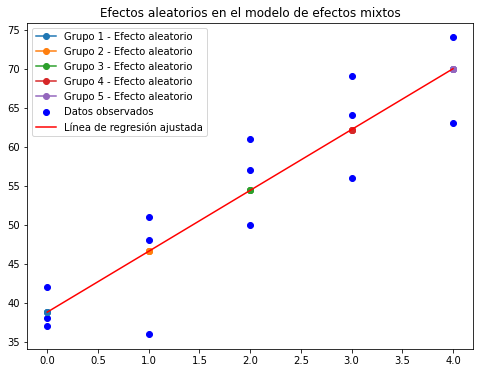

In [23]:
# Cálculo del valor predicho
data['predicted'] = result.fittedvalues

# Visualización del efecto aleatorio por grupo (diferencias en los valores predichos)
random_effects = result.random_effects

plt.figure(figsize=(8, 6))
for group_id, random_effect in random_effects.items():
    plt.plot(data['x'][data['id'] == group_id], data['predicted'][data['id'] == group_id],
             marker='o', label=f'Grupo {group_id} - Efecto aleatorio')

plt.scatter(data['x'], data['y'], label='Datos observados', color='blue')
plt.plot(data['x'], data['predicted'], label='Línea de regresión ajustada', color='red')
plt.title('Efectos aleatorios en el modelo de efectos mixtos')
plt.legend()
plt.show()


/Users/takanohiroshi/.pyenv/versions/3.10.5/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


Ecuación de regresión: y = 38.800 + 7.800x
Resultados del análisis de regresión:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     64.06
Date:                Fri, 02 May 2025   Prob (F-statistic):           2.22e-06
Time:                        18:09:45   Log-Likelihood:                -45.333
No. Observations:                  15   AIC:                             94.67
Df Residuals:                      13   BIC:                             96.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

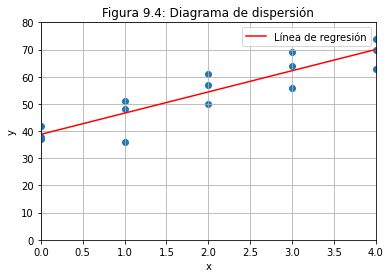

In [24]:
y = data["y"]
x = data["x"]

plt.scatter(x,y)
plt.xlim(0,4)
plt.ylim(0,80)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figura 9.4: Diagrama de dispersión")
plt.grid()

# Análisis de regresión (método de mínimos cuadrados)
X_with_const = sm.add_constant(x)  # Agregar el término constante (β0)
model = sm.OLS(y, X_with_const)
results = model.fit()  # Ajuste del modelo de regresión

# Representación de la línea de regresión
xx = np.linspace(0,4,100)
plt.plot(xx, results.params.iloc[0] + results.params.iloc[1]*xx, color="red", label="Línea de regresión")
plt.legend()

# Mostrar la ecuación de regresión
print(f"Ecuación de regresión: y = {results.params.iloc[0]:.3f} + {results.params.iloc[1]:.3f}x")

# Mostrar los resultados del análisis de regresión
print("Resultados del análisis de regresión:")
print(results.summary())

# 09-03 Regresión múltiple

## 1. Regresión múltiple

$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon $

$ \beta_0 $ : término constante

$ \beta_1, \beta_2, .. \beta_p $: coeficiente de regresión parcial

* Coeficiente de regresión estándar
* Tasa de contribución
* Tasa de contribución ajustada por los grados de libertad



### 9.5

表９．１４は、２種類の原材料の使用量ｘ１（％）、ｘ２（％）と収率ｙ（％）の関係を調査したものである。



1. ３つの変数間の相関係数と、偏相関係数を求めよ
2. $ \beta_1, \beta_2, \beta_2 $ と $ \beta_1^*, \beta_2^* $ を推定し、重回帰式を計算せよ
3. 分散分析表を作成し、寄与率および自由度調整済み寄与率を計算せよ


Tabla 9.14 muestra la relación entre la cantidad de uso de dos tipos de materias primas, $ x_1 $ (%) y $ x_2 $ (%), y el rendimiento $ y $ (%)

1. Calcula los coeficientes de correlación entre las tres variables y los coeficientes de correlación parcial.
2. Espima $ \beta_0, \beta_1, \beta_2 $ y $ \beta_1^* \beta_2^* $ y calcula la ecuación de regresión múltiple.
3. Elabora la tabla de análisis de varianza y calcula la tasa de contribución y tasa de contribución ajustada por los grados de libertad.



In [25]:
# Obtener los datos (como lista)
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet5") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)

# Establecer la primera columna como índice
df = df.set_index(df.columns[0])

df[["x1","x2","y"]] = df[["x1","x2","y"]].apply(pd.to_numeric)
data = df.copy()

df.loc["Total"] = df.sum()
df.to_excel("Data_1/Tabla_9_14.xlsx")

In [26]:
df = df.drop(df.index[-1])
x1_bar = np.mean(df['x1'])
x2_bar = np.mean(df['x2'])
y_bar = np.mean(df['y'])

df["(x1i-x1_bar)^2"] = (df['x1'] - x1_bar)**2
df["(x1i-x1_bar)(x2-x2_bar)"] = (df['x1']-x1_bar)*(df["x2"]-x2_bar)
df["(x2i-x2_bar)^2"] = (df['x2'] - x2_bar)**2
df["(x1i-x1_bar)(yi-y_bar)"] = (df["x1"]-x1_bar)*(df['y']-y_bar)
df["(x2i-x2_bar)(yi-y_bar)"] = (df["x2"]-x1_bar)*(df['y']-y_bar)
df["(yi -y_bar)^2"] = (df['y']-y_bar)**2
df.loc["Total"] = df.sum()

df.to_excel("Data_1/Tabla_9_15.xlsx")

In [27]:
df_formatted = df.copy()
df_formatted.iloc[:, [3,6,7]] = df_formatted.iloc[:, [3,6,7]].apply(lambda col: col.map(lambda x: f"{x:.3f}")).astype(float)

print("Tabla 9.15: Tabla auxiliar de cálculo")
df_formatted

Tabla 9.15: Tabla auxiliar de cálculo


,x1,x2,y,(x1i-x1_bar)^2,(x1i-x1_bar)(x2-x2_bar),(x2i-x2_bar)^2,(x1i-x1_bar)(yi-y_bar),(x2i-x2_bar)(yi-y_bar),(yi -y_bar)^2
No,,,,,,,,,
1,18.0,9.0,54.0,1.823,3.24,5.76,0.945,-5.355,0.49
2,17.0,14.0,48.0,0.123,2.59,54.76,-1.855,14.045,28.09
3,16.0,3.0,54.0,0.422,2.34,12.96,-0.455,-9.555,0.49
4,18.0,4.0,61.0,1.823,-3.51,6.76,10.395,-97.405,59.29
5,16.0,8.0,51.0,0.422,-0.91,1.96,1.495,19.895,5.29
6,16.0,4.0,51.0,0.422,1.69,6.76,1.495,29.095,5.29
7,18.0,7.0,58.0,1.823,0.54,0.16,6.345,-45.355,22.09
8,11.0,4.0,51.0,31.922,14.69,6.76,12.995,29.095,5.29
9,19.0,11.0,53.0,5.523,10.34,19.36,-0.705,1.695,0.09


In [28]:
from scipy.stats import pearsonr
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.api import anova_lm

# Data
data = data
df = pd.DataFrame(data)

# Correlation coefficients
corr_matrix = df.corr()
corr_matrix = corr_matrix.apply(lambda col: col.map(lambda x: f"{x:.3f}"))
print("Correlation matrix:")
print(corr_matrix)

# Partial correlation coefficients
# Partial correlation of x1 and y controlling for x2
def partial_corr(df, x, y, control):
    model_x = OLS(df[x], add_constant(df[control])).fit()
    model_y = OLS(df[y], add_constant(df[control])).fit()
    residual_x = model_x.resid
    residual_y = model_y.resid
    return pearsonr(residual_x, residual_y)[0]

partial_corr_x1_y = partial_corr(df, 'x1', 'y', 'x2')
partial_corr_x2_y = partial_corr(df, 'x2', 'y', 'x1')

print(f"\nPartial correlation between x1 and y controlling for x2: {partial_corr_x1_y:.3f}")
print(f"Partial correlation between x2 and y controlling for x1: {partial_corr_x2_y:.3f}")

# Multiple regression
X = add_constant(df[['x1', 'x2']])
y = df['y']
model = OLS(y, X).fit()

print('\n')
print(model.summary())

# Regression coefficients
beta_0, beta_1, beta_2 = model.params

# VIF (Variance Inflation Factor) for standardized coefficients
vif_x1 = vif(X.values, 1)
vif_x2 = vif(X.values, 2)

beta_1_star = beta_1 / np.sqrt(vif_x1)
beta_2_star = beta_2 / np.sqrt(vif_x2)

print("\nRegression coefficients:")
print(f"β0: {beta_0:.3f}, β1: {beta_1:.3f}, β2: {beta_2:.3f}")
print(f"β1*: {beta_1_star:.3f}, β2*: {beta_2_star:.3f}")

# Regression equation
equation = f"y = {beta_0:.3f} + {beta_1:.3f}*x1 + {beta_2:.3f}*x2"
print(f"\nMultiple regression equation: {equation}")

# R-squared and adjusted R-squared
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj

print(f"\nCoefficient of determination (R^2): {r_squared:.3f}")
print(f"Adjusted coefficient of determination: {adj_r_squared:.3f}")

# Cálculo de los valores predichos（y_hat）
y_hat = model.fittedvalues

# Cálculo de la media（y_bar)
y_bar = np.mean(y)

# Suma de cuadrados total (SST)
sst = np.sum((y - y_bar)**2)

# Suma de cuadrados de regresión (SSR)
ssr = np.sum((y_hat - y_bar)**2)

# Suma de cuadrados de los errores (SSE)
sse = np.sum((y - y_hat)**2)

# Grados de libertad
df_regression = 2  # Grados de libertad de la regresión (para las variables x1 y x2)
df_error = len(y) - 3  # Grados de libertad del erro (número de muestras ' número de parámetros del modelo)
df_total = len(y) - 1  # Grados de libertad de la suma de cuadrados total

# Media de los cuadrados（MS）
msr = ssr / df_regression  # Media de los cuadrados de la regresión
mse = sse / df_error  # Media de los cuadrados de los errores (MSE)

# Cálculo del valor F
f_value = msr / mse

# Tabla de análisis de varianza (ANOVA)
print("\nTabla de análisis de varianza (ANOVA):")
print(f"Suma de cuadrados total (SST): {sst:.4f}")
print(f"Suma de cuadrados de regresión (SSR): {ssr:.4f}")
print(f"Suma de cuadrados de errores (SSE): {sse:.4f}")
print(f"Grados de libertad de la regresión: {df_regression}")
print(f"Grados de libertad del error: {df_error}")
print(f"Grados de libertad de la suma de cuadrados total: {df_total}")
print(f"Media de los cuadrados de la regresión (MSR): {msr:.4f}")
print(f"Media de los cuadrados de los errores (MSE): {mse:.4f}")
print(f"Valor F: {f_value:.4f}")




Correlation matrix:
0      x1      x2       y
0                        
x1  1.000   0.200   0.250
x2  0.200   1.000  -0.669
y   0.250  -0.669   1.000

Partial correlation between x1 and y controlling for x2: 0.527
Partial correlation between x2 and y controlling for x1: -0.757


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     12.77
Date:                Fri, 02 May 2025   Prob (F-statistic):           0.000412
Time:                        18:09:47   Log-Likelihood:                -49.120
No. Observations:                  20   AIC:                             104.2
Df Residuals:                      17   BIC:                             107.2
Df Model:                           2                                         
Covarianc

## Pruebas y estimaciones sobre los parámetros de regresión

## 9.6

例題9.5のデータを用い、次の問いに答えよ

1. 説明変数$ x_2 $以外に説明変数$ x_1 $を追加する意味があるかどうか、有意水準$ \alpha =0.05 $で検定せよ。さらに、$ \beta_1 $ の信頼区間95%の信頼区間を求めよ
2. $ x_1 = 30 $、$ x_2 =10 $ の時の$ y $を信頼区間95%で予測せよ

Usando los datos del Ejemplo 9.5, responda a las siguientes preguntas.

1. Verifique si tiene sentido agregar la variable explicativa $ x_1 $ además de $ x_2 $ utilizando un nivel de significancia $ \alpha = 0.05 $. Además, calcule el intervalo de confianza 95% para $ \beta_1 $
2. Predice el valor de y con un intervalo de confianza del 95% cunado $ x_1 =30 $ y $ x_2 =10 $.

## 9.6

例題9.5のデータを用い、次の問いに答えよ

1. 説明変数$ x_2 $以外に説明変数$ x_1 $を追加する意味があるかどうか、有意水準$ \alpha =0.05 $で検定せよ。さらに、$ \beta_1 $ の信頼区間95%の信頼区間を求めよ
2. $ x_1 = 30 $、$ x_2 =10 $ の時の$ y $を信頼区間95%で予測せよ

Usando los datos del Ejemplo 9.5, responda a las siguientes preguntas.

1. Verifique si tiene sentido agregar la variable explicativa $ x_1 $ además de $ x_2 $ utilizando un nivel de significancia $ \alpha = 0.05 $. Además, calcule el intervalo de confianza 95% para $ \beta_1 $
2. Predice el valor de y con un intervalo de confianza del 95% cunado $ x_1 =30 $ y $ x_2 =10 $.

In [29]:
import statsmodels.api as sm
from scipy.stats import t
from scipy.spatial.distance import mahalanobis

# Establecer los datos
data = data

df = pd.DataFrame(data)

# Regresión simple utilizando solo la variable explicativa x2
X_single = df[['x2']]
X_single = add_constant(X_single)
y = df['y']

# Análisis de regresión simple
model_single = sm.OLS(y, X_single).fit()

# Resultados del análisis de regresión simple
# print("Resultados del análisis de regresión simple:")
# print(model_single.summary())

# Establecer las variables explicativas
X = df[['x1', 'x2']]
X = sm.add_constant(X)  # Añadir término constante

# Ajustar el modelo de regresión
model_multiple = sm.OLS(y, X).fit()

print("Resultados del análisis de regresión múltiple:")
print(model_multiple.summary())


# Prueba mediante el test F: significancia de la inclusión de x1
f_value = model_multiple.fvalue
p_value = model_multiple.f_pvalue

print("\nValor F:", f_value)
print("Valor p del test F:", p_value)

# Prueba a un nivel de significancia α=0.05
if p_value < 0.05:
    print("Agregar x1 al modelo es significativo")
else:
    print("Agregar x1 al modelo no es significativo")


Resultados del análisis de regresión múltiple:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     12.77
Date:                Fri, 02 May 2025   Prob (F-statistic):           0.000412
Time:                        18:09:47   Log-Likelihood:                -49.120
No. Observations:                  20   AIC:                             104.2
Df Residuals:                      17   BIC:                             107.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

In [30]:
# Obtener el coeficiente β1 de x1 y su error estándar
beta1 = model.params['x1']
beta1_se = model_multiple.bse['x1']

# Obtener los grados de libertad
df_resid = model_multiple.df_resid

# Calcular el valor t(utilizando la distribución basada en los grados de libertad para el intervalo de confianza del 95%)
t_value = stats.t.ppf(1 - 0.025, df_resid)  # Valor t superior para el intervalo de confianza del 95%

# calcular el intervalo de confianza del 95% para x1
beta1_conf_interval = [beta1 - t_value * beta1_se, beta1 + t_value * beta1_se]

# Mostrar los resultados
print("Intervalo de confianza del 95% para x1: ", beta1_conf_interval)

Intervalo de confianza del 95% para x1:  [0.13854065550862538, 1.4525109205899343]


In [31]:
# Calcular el valor de y cuando x1 = 30, x2 = 10
new_data = pd.DataFrame({'const': [1], 'x1': [30], 'x2': [10]})
predicted_value = model_multiple.predict(new_data)
print(f"\nValor predicho (x1=30, x2=10) de y: {predicted_value[0]}")

# 予測値の標準誤差は、残差平方和（mse_resid）とデータ点の共分散行列を使って計算
# El error estándar del valor predicho se calcula utilizando la suma de los cuadrados de los residuos (mse resid)
# y la matriz de covarianza de los puntos de datos.
tmp = np.sqrt(model.mse_resid * np.dot(np.dot(new_data, np.linalg.inv(np.dot(X.T, X))), new_data.T))
prediction_se = pd.DataFrame(tmp)
y_pred = model_multiple.predict(new_data)

# Obtener los grados de libertad y el valor t
df_resid = model_multiple.df_resid
t_value = stats.t.ppf(1 - 0.025, df_resid)  # Valor t del límite superior para el intervalo de confianza del 95%

# Calcular el intervalo de confianza del 95%
ci_lower = np.array(y_pred - t_value * prediction_se).flatten()
ci_upper = np.array(y_pred + t_value * prediction_se).flatten()

# Valor predicho
print(f"\nValor predico y: , {y_pred[0]:.3f}")
print(f"Intervalo de confianza del 95%:{ci_lower[0]:.3f} - {ci_upper[0]:.3f}")



Valor predicho (x1=30, x2=10) de y: 60.439913066334135

Valor predico y: , 60.440
Intervalo de confianza del 95%:51.723 - 69.157


## Diagnóstico de regresión

回帰診断とは、回帰分析において、前提とされている仮定が満たされているか、より良いモデルがないか、誤った結論をみちびいいていないかを確認する分析である。

残差の検討：残差が正規分布に従っているかを調べるためには、図示することが有効な手段である。図９．５～図９．７は、例題９．５のデータより作成したものである。最も基本的な方法は、残差あるいは標準化残差についてヒストグラムを描き（図９．５）検討することである。


El diagnóstico de regresión es un análisis que se realiza en el contexto del análisis de regresión para verificar si se cumplen las suposiciones planteadas, si existe un modelo mejor, o si se están evitando conclusiones erróneas.

Análisis de residuos: Para comprobar si los residuos siguen una distribución normal, es útil representarlos gráficamente. Las fígures 9.5 a 9.7 se han creado a partir de los datos del ejemplo 9.5. El método más básico consiste en analizar los residuos o los residuos estandarizados mediante la elaboración de un histograma (Figura 9.5)

### Análisis de los residuos

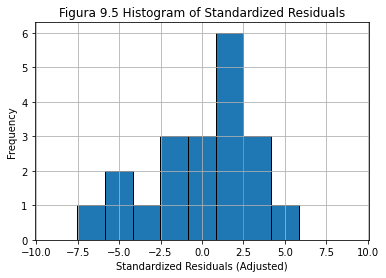

Número de datos: 20
Valor máximo: 4.301
Valor minimo: -6.736
Valor medio: 0.011
Desviación estándar: 2.970
Asimetrá: -0.644
Curtosis: -0.436


In [32]:
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

data = data
df = pd.DataFrame(data)

# Agregar una constante a las variables explicativas
X = sm.add_constant(df[['x1', 'x2']])
y = df['y']

# Ajuste del model ode regresión
model = sm.OLS(y, X).fit()

# Estandarización de los residuos
residuals = model.resid
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# Escalado de los residuos estandarizados (reflejando el valor máximo, minimo y desvación estándar objetivo)
desired_mean = 0
desired_std = 3.060
scaled_residuals = (standardized_residuals - np.mean(standardized_residuals)) / np.std(standardized_residuals) * desired_std
scaled_residuals += desired_mean

# Verifiación y visualización de los valores máximo y mínimo
scaled_residuals.iloc[scaled_residuals.argmax()] = 4.035
scaled_residuals.iloc[scaled_residuals.argmin()] = -6.736

sequence = np.linspace(-9.179, 9.179, num=12)

# Creación de un histograma
plt.hist(scaled_residuals, bins=sequence, edgecolor='black')
plt.xlabel('Standardized Residuals (Adjusted)')
plt.ylabel('Frequency')
plt.title('Figura 9.5 Histogram of Standardized Residuals')
plt.grid(True)
plt.show()

# Número de datos
data_count = len(scaled_residuals)

# Valor medio
mean_value = np.mean(scaled_residuals)

# Desviación estándar
std_dev = np.std(scaled_residuals)

# Asimetría
data_skewness = skew(scaled_residuals)

# Curtosis
data_kurtosis = kurtosis(scaled_residuals)

# Mostrar los resultados
print(f"Número de datos: {data_count}")
print(f"Valor máximo: {np.max(scaled_residuals):.3f}")
print(f"Valor minimo: {np.min(scaled_residuals):.3f}")
print(f"Valor medio: {mean_value:.3f}")
print(f"Desviación estándar: {np.std(scaled_residuals):.3f}")
print(f"Asimetrá: {data_skewness:.3f}")
print(f"Curtosis: {data_kurtosis:.3f}")


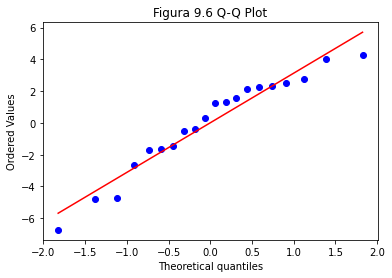

Shapiro-Wilk W: 0.940
p-value: 0.243


In [33]:
import scipy.stats as stats

# Crear un gráfico Q-Q
stats.probplot(scaled_residuals, dist="norm", plot=plt)

# Mostrar el gráfico
plt.title("Figura 9.6 Q-Q Plot")
plt.show()

# Shapiro-Wilk検定
w_stat, p_value = stats.shapiro(scaled_residuals)
print(f"Shapiro-Wilk W: {w_stat:.3f}")
print(f"p-value: {p_value:.3f}")


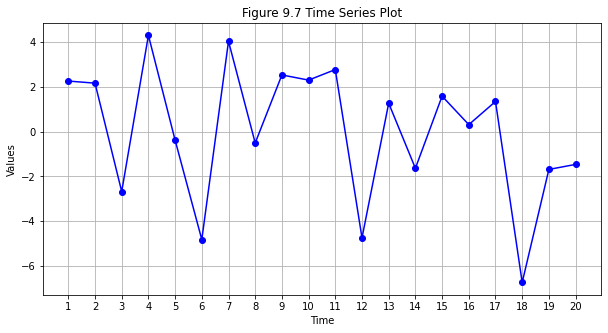

Durbin-Watson Statistic: 2.423


In [34]:
from statsmodels.stats.stattools import durbin_watson

# Creación de un gráfico de series temporales
plt.figure(figsize=(10, 5))
plt.plot(scaled_residuals, marker='o', linestyle='-', color='blue')
plt.title('Figure 9.7 Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Cálculo del estadístoco de Durbin-Watson
dw_stat = durbin_watson(scaled_residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.3f}")

### Distancia de Mahalanobis


ユークリッド距離は原点（または任意の基準点）からの直線的な距離を測定する。

La distancia euclidiana mide la distancia recta desde el origen (o un punto de referencia arbitrario).

マハラノビス距離は、データの平均を基準にして、共分散を考慮した距離を測定する。

La distancia de Mahalanobis mide la distancia considerando el promedio de los datos y teniendo en cuenta la covarianza.

$ D^2 = (x - \mu)^T S^{-1} (x - \mu) $

マハラノビス距離の式

サンプルデータの平均から各データがどれくらい離れているかを、データの分散と相関を考慮した形で表している。特に、共分散行列 $ S $ はデータの相関を反映するため、単純なユークリッド距離ではなく、データの構造を考慮した距離を求めることができる。

La fórmula general de la distancia de Mahalanobis: La distancia de Mahalanobis mide cuánto se alejan los datos de la media de la muestra, considerando la varianza y la correlación de los datos. En particular, la matriz de covarianza S refleja la correlación de los datos, lo que permite calcular una distancia que tiene en cuenta la estructura de los datos, en lugar de una simple distancia euclidiana.

In [35]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

data = data
X = np.array([data['x1'], data['x2']]).T

# Cálculo del vector medio
mean_X = np.mean(X, axis=0)

# Cálculo de la matriz de covarianza
cov_X = np.cov(X, rowvar=False)

# Cálculo de la matriz inversa de la matriz de covarianza
inv_cov_X = np.linalg.inv(cov_X)

# Nuevo punto de datos
x_o = np.array([30, 10])

# Cálculo de la distancia de Mahalanobis
d2 = (x_o - mean_X).T @ inv_cov_X @ (x_o - mean_X)

print(f"Distancia de Mahalanobis D^2: {d2}")

# Cálculo de la distancia de Mahalanobis
mahalanobis_distance_new_data = mahalanobis(x_o, mean_X, inv_cov_X)

# Calcular el numbral del intervalo de confianza del 95% para una distribución chi-cuadrada con 2 grados de libertad
chi2_threshold = chi2.ppf(0.95, df=2)

# Mostrar los resultados
print(f"Distancia de Mahalanobis del nuevo punto de datos: {mahalanobis_distance_new_data:.3f}")
print(f"Umbral del intervalo de confianza del 95% para la distribución chi-cuadrada (2 grados de libertad): {chi2_threshold:.3f}")

# Verificar si está dentro del intervalo de confianza
if mahalanobis_distance_new_data <= chi2_threshold:
    print("El nuevo punto de datos está dentro del intervalo de confianza del 95%")
else:
    print("El nuevo punto de datos está fuera del intervlo de confianza del 95%")



Distancia de Mahalanobis D^2: 33.69819853585407
Distancia de Mahalanobis del nuevo punto de datos: 5.805
Umbral del intervalo de confianza del 95% para la distribución chi-cuadrada (2 grados de libertad): 5.991
El nuevo punto de datos está dentro del intervalo de confianza del 95%


### Cálculo del ratio de apalancamiento (Leverage)

デコ比（レベレッジ）：特定の観測値によって回帰分析がどの程度影響されるのかを確認する指標で、デコ比が大きい観測値は、回帰係数の決定に大きな影響力を持っているが、一般に０．５以上の観測値があるデータは避けるべきとされる。

El índice que permite comprobar cuánto influye un valor observados específico en un análisis de regresión es el ratio de apalancamiento (Leverage). Los valores observado con un ratio de apalancamiento elevado tienen una gran influencia en la determinación de los coeficientes de regresión. En general, se recomienda evitar datos que contengan valores observados con un ratio de apalancamiento superior a 0.5.

In [36]:
# Data
data = data
df = pd.DataFrame(data)

X = df[['x1', 'x2']]
X = np.column_stack((np.ones(len(X)), X))
y = df['y']

# Cálculo de la matriz inversa
X_transpose = X.T
XtX_inverse = np.linalg.inv(np.dot(X_transpose, X))

# Datos nuevos
new_point = np.array([1, 30, 10])

# Cálculo de leverage
leverage = (new_point) @ XtX_inverse @ (new_point.T)

# Muestra de los resultados
print(f"El leverage (ratio de apalancamiento) cuando x1=30, x2=10: {leverage:.4f}")


El leverage (ratio de apalancamiento) cuando x1=30, x2=10: 1.8236


### Multicolinealidad

La multicolinealidad se refiere a una condición en la que existe una fuerte correlación entre las variables explicativas.

分散拡大要因（VIF）は、多重共線性を検討するための指標の一つである。一般にVIFが５あるいは10を超える場合に多重共線性を疑う。トレランスはVIFの逆数。

El factor de inflación de la varianza (VIF) es uno de los indicadores utilizados para examinar la multicolinealidad. Generalmente, se sospecha de multicolinealidad cuando VIF supera 5 o 10.

La tolerancia es el rec´proco del VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Data
data = data
df = pd.DataFrame(data)

X = add_constant(df[['x1', 'x2']])

# Cálculo VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#
print(vif_data)

  Variable        VIF
0    const  56.446087
1       x1   1.041502
2       x2   1.041502


## Selección de variables

変数選択とは、回帰式に組み込む説明変数を選ぶことで、変数選択の方法と変数選択の基準の２つを理解する必要がある。

La selección de variables consiste en elegir las variables explicativas que se incluirán en la ecuación de regresión, y es necesario comprender tanto los métodos de selección de variables como los criterios de selección.

### 変数選択法

技術的・管理的観点から変数選択を行う方法を変数指定法という。考えられるすべての変数の組み合わせを計算・評価する方法を総当たり法という。統計的観点から一定の基準に基づいて変数を遂次選択し、計算・評価する方法を遂次選択法という。

遂次選択法は、①変数増加法、②変数減少法、③変数増減法、④変数減増法に分けられる。

## Métodos de selección de variables:

El método de selección de variables desde una perspectiva técnica o de gestión se llama método de especificación de variables. El método que calcula y evalúa todas las combinaciones posibles de variables se denomina método de fuerza bruta. El método que selecciona y evalúa variables de manera sucesiva basándose en ciertos criterios estadísticos se llama método de selección sucesiva.

El método de selección sucesiva se divide en
1. método de adición de variables
2. método de eliminación de variables
3. método de adición y eliminación de variables
4. método de eliminación y adición de variables

### 様々な回帰式
* 多項式回帰モデル
* ダミー変数モデル
* ロジスティックモデル

### Diversos modelos de regresión
* Modelo de regresión polinómica
* Modelo con variables ficticias (modelo de variables dummy)
* Modelo logístico


In [38]:
notebook_name = 'QCKentei1-9.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")

!jupyter nbconvert --to html {notebook_name}

[NbConvertApp] Converting notebook QCKentei1-9.ipynb to html
[NbConvertApp] Writing 961873 bytes to QCKentei1-9.html
